In [14]:
import PIL
import os
import os.path
from PIL import Image

f = r'C:\Users\Mani\Desktop\MiniProject\Diabetic_Retinopathy_Detection-master\data\data\input'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((299,299))
    img.save(f_img)

In [15]:
arr=[]
import numpy as np
from numpy import asarray
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    numpydata = asarray(img)
    arr.append(numpydata)
arr3=np.array(arr)
print(arr3[0].shape)
print(len(arr3))
print(type(arr3))

(299, 299, 3)
300
<class 'numpy.ndarray'>


In [16]:
X=arr3

In [17]:
arr1=[]
f = r'C:\Users\Mani\Desktop\MiniProject\Diabetic_Retinopathy_Detection-master\data\data\test'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    numpydata = asarray(img)
    arr1.append(numpydata)
arr4=np.array(arr1)
print(arr4[0].shape)
print(len(arr4))
print(type(arr4))

(299, 299, 3)
300
<class 'numpy.ndarray'>


In [18]:
X_test = arr4

In [19]:
import pandas as pd
data=pd.read_csv('testLabels.csv')
y_test=data['level'].values
print((y_test))

[0 0 0 0 1 2 4 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 2 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 0 0 2 2 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 1 1 0 0 2 2 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 4
 4 0 0 2 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 4 4 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 1 2 0 0 0 0 2 2 4 4 2 3 0 0 0 0 0 0 0 2 0 0 0 0
 1 1 0 0]


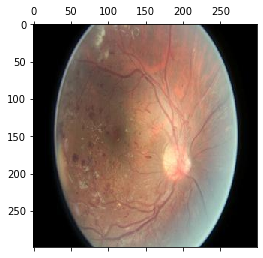

In [20]:
import matplotlib.pyplot as plt 
plt.matshow(X[0])

In [21]:
y=[]
for i in range(8):
    y.append(4)
print(y)

[4, 4, 4, 4, 4, 4, 4, 4]


In [22]:
for i in range(17):
    y.append(1)
print(y)

[4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [23]:
for i in range(5):
    y.append(3)
print(y)

[4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3]


In [24]:
for i in range(39):
    y.append(2)
print(y)

[4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [25]:
for i in range(231):
    y.append(0)

In [26]:
len(y)

300

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [28]:
X = np.array(X)
type(X)
X.shape

(300, 299, 299, 3)

In [29]:
y = np.array(y)
y.shape

(300,)

In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(299,299,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Dropout(0.2))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
#model.add(Dropout(0.2))
model.add(Dense(5))

model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 297, 297, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 295, 295, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 295, 295, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 64)      1

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(), 
                metrics=['accuracy']
                )

In [40]:
history = model.fit (X,y,epochs=10)

Epoch 1/10
10/10 [==============================] - 134s 13s/step - loss: 0.7415 - accuracy: 0.7700
Epoch 2/10
10/10 [==============================] - 119s 12s/step - loss: 0.6846 - accuracy: 0.7700
Epoch 3/10
10/10 [==============================] - 116s 12s/step - loss: 0.6749 - accuracy: 0.7800
Epoch 4/10
10/10 [==============================] - 115s 12s/step - loss: 0.6345 - accuracy: 0.7800
Epoch 5/10
10/10 [==============================] - 116s 12s/step - loss: 0.6038 - accuracy: 0.7800
Epoch 6/10
10/10 [==============================] - 114s 11s/step - loss: 0.5563 - accuracy: 0.8067
Epoch 7/10
10/10 [==============================] - 114s 11s/step - loss: 0.5966 - accuracy: 0.8000
Epoch 8/10
10/10 [==============================] - 115s 11s/step - loss: 0.5533 - accuracy: 0.7933
Epoch 9/10
10/10 [==============================] - 114s 11s/step - loss: 0.5081 - accuracy: 0.8167
Epoch 10/10
10/10 [==============================] - 116s 12s/step - loss: 0.4739 - accuracy: 0.8167

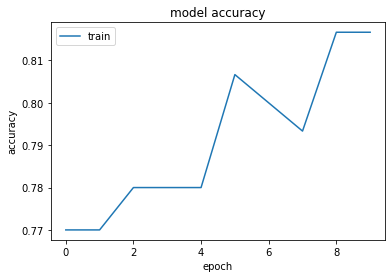

In [42]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

In [43]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 20s 2s/step - loss: 1.3392 - accuracy: 0.7200


[1.3391727209091187, 0.7200000286102295]

In [36]:
Y_predicted=model.predict(X_test)